In [69]:
from sklearn import datasets
from sklearn import model_selection  
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sn

In [70]:
redfin = pd.read_csv('./redfin_market_tracker_LI_cleanup.csv')
print(redfin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   1406 non-null   object 
 1   property_type            1406 non-null   object 
 2   property_type_id         1406 non-null   int64  
 3   median_sale_price        1406 non-null   float64
 4   median_list_price        1403 non-null   float64
 5   median_ppsf              1395 non-null   float64
 6   median_list_ppsf         1403 non-null   float64
 7   homes_sold               1406 non-null   float64
 8   pending_sales            1388 non-null   float64
 9   new_listings             1403 non-null   float64
 10  inventory                1406 non-null   float64
 11  months_of_supply         1406 non-null   float64
 12  median_dom               1406 non-null   float64
 13  avg_sale_to_list         1405 non-null   float64
 14  sold_above_list         

In [71]:
print(list(redfin.columns.values))
# ['region', 'property_type', 'property_type_id', 'median_sale_price', 'median_list_price', 'median_ppsf', 'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings', 'inventory', 'months_of_supply', 'median_dom', 'avg_sale_to_list', 'sold_above_list', 'price_drops', 'off_market_in_two_weeks', 'period']

['region', 'property_type', 'property_type_id', 'median_sale_price', 'median_list_price', 'median_ppsf', 'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings', 'inventory', 'months_of_supply', 'median_dom', 'avg_sale_to_list', 'sold_above_list', 'price_drops', 'off_market_in_two_weeks', 'period', 'timestamp', 'interest_rate']


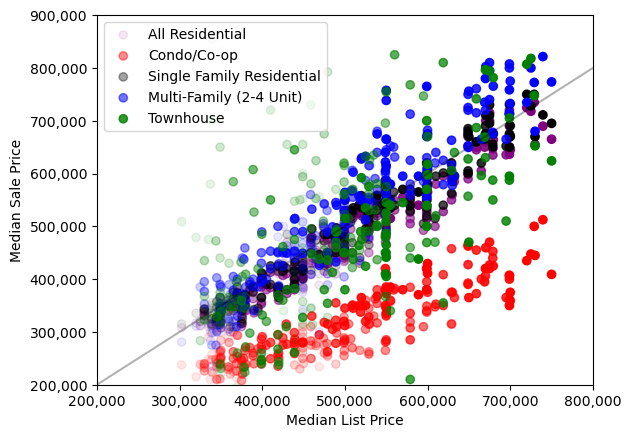

In [72]:
current_period = datetime.now().year

# Set labels, format and window cutoff
plt.xlabel('Median List Price')
plt.ylabel('Median Sale Price')
plt.xlim(200000, 800000)
plt.ylim(200000, 900000)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Color by property type
color_map = {
    'Single Family Residential': 'black',
    'Condo/Co-op': 'red',
    'Townhouse': 'green',
    'Multi-Family (2-4 Unit)': 'blue',
    'All Residential': 'purple'
    }
colors = [color_map[x] for x in redfin['property_type']]

for property_type in set(redfin['property_type']):
    xi = redfin[redfin['property_type'] == property_type]['median_list_price']
    yi = redfin[redfin['property_type'] == property_type]['median_sale_price']

    # Depending on age, we'll make older data more transparent
    periodi = redfin[redfin['property_type'] == property_type]['period'].str[:4].astype(int)
    alphai = 1 - (current_period - periodi) / (current_period - periodi.min())
    plt.scatter(xi, yi, c=color_map[property_type], label=property_type, alpha=alphai)

# Plot a diagonal x=y line
plt.plot([200000, 800000], [200000, 800000], c='black', alpha=0.3)

plt.legend()
plt.show()


### Takeaways:

- People are listing Condos and Co-ops at a higher price then they are actually being sold for.
- Multi-Family homes are either being sold at the listing price, or generally higher. Faded (historical) points show this wasn't always the case.
- As time went on, house prices trended both upwards and more towards the listing price rather than listed high / sold low.

In [73]:
# Prepare data for regression
redfin = redfin.dropna()
X = redfin[['median_list_price', 'off_market_in_two_weeks', 'property_type_id', 'timestamp', 'interest_rate']]
y = redfin['median_sale_price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.7)

regressor = linear_model.LinearRegression()

# Fit the regressor
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

In [74]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result.head(10))

        Actual      Predicted
397   320000.0  301042.762235
161   505000.0  453164.555568
965   317031.5  240678.000975
126   510000.0  511519.413213
62    429500.0  540313.012996
966   548500.0  509905.017210
1285  462500.0  598485.666495
1088  285000.0  526812.611669
93    350000.0  309688.819890
1174  253500.0  351062.484557


Mean Absolute Error: 77708.25300512584
R-squared: 0.5215603321345675


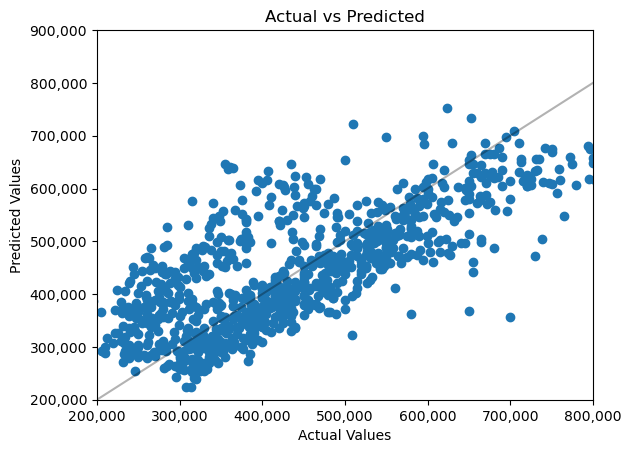

In [79]:
# Calculate performance metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.xlim(200000, 800000)
plt.ylim(200000, 900000)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot([200000, 800000], [200000, 800000], c='black', alpha=0.3)
plt.show()

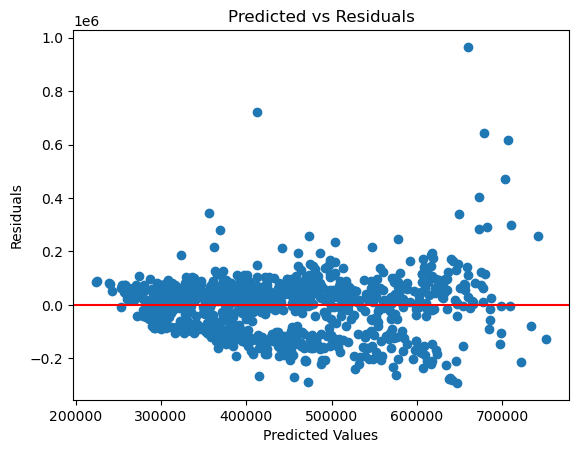

In [77]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()